In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
df = pd.read_csv('../simulation_output/run2/sim1_l.csv')

In [3]:
df.head()

,type,n,p,corr_p
0,same,100,0.51,0.51
1,same,100,0.42,0.42
2,same,100,0.51,0.51
3,same,100,0.53,0.53
4,same,100,0.50,0.50


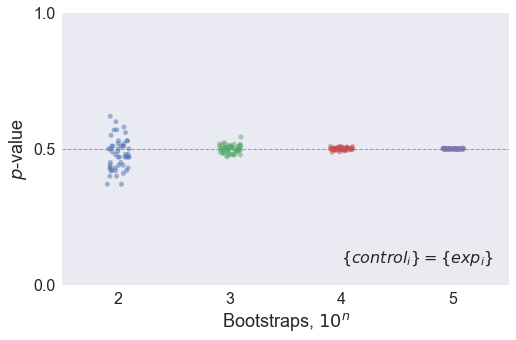

In [4]:
# central limit theorem
fig, ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=df[df.type == 'same'], x='n', y='corr_p', alpha=0.5, jitter=True, ax=ax)
plt.axhline(0.5, ls='--', lw=1, color='red', alpha=0.5)

plt.ylim(0,1)
plt.yticks([0.0, 0.5, 1.0])

plt.gca().set_xticklabels([2, 3, 4, 5])

plt.xlabel('Bootstraps, $10^n$')
plt.ylabel('$p$-value')

# plt.text(2., 0.37, r'$\{control_i\}=\{exp_i\}$', bbox=dict(facecolor='none', edgecolor='k', pad=10.0), fontsize=16)
plt.text(2, 0.08, '$\{control_i\}=\{exp_i\}$', fontsize=16)
# plt.title('$p$-values for varying Bootstraps')
plt.savefig('../simulation_output/plots/run2_sim1_same.svg', bbox_inches='tight')


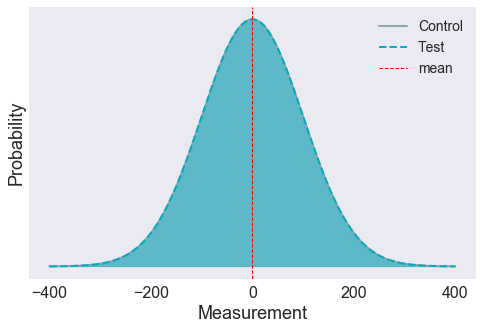

In [5]:
x = np.linspace(-400, 400, 1000)
y_c = st.norm.pdf(x, loc=0.0, scale=100)
y_e = st.norm.pdf(x, loc=0.0, scale=100)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x,y_c, label='Control', color='#90A4AE')
plt.plot(x,y_e, label='Test', color='#00ACC1', ls='--')
plt.axvline(0.0, color='r', ls='--', label='mean', lw=1)
ax.fill_between(x, y_c, alpha=0.5, color='#90A4AE')
ax.fill_between(x, y_e, alpha=0.5, color='#00ACC1')

plt.xticks([-400, -200, 0, 200, 400])
plt.yticks([])

plt.legend()

plt.xlabel('Measurement')
plt.ylabel('Probability')

plt.savefig('../simulation_output/plots/run2_sim1_same_dist.svg', bbox_inches='tight')

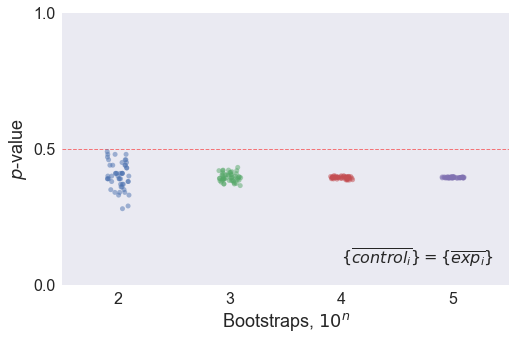

In [6]:
# explanation for convergence to .4?????
fig, ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=df[df.type == 'stat'], x='n', y='corr_p', alpha=0.5, jitter=True, ax=ax)
plt.axhline(0.5, ls='--', lw=1, color='red', alpha=0.5)

plt.ylim(0,1)
plt.yticks([0.0, 0.5, 1.0])

plt.gca().set_xticklabels([2, 3, 4, 5])

plt.xlabel('Bootstraps, $10^n$')
plt.ylabel('$p$-value')


plt.text(2, 0.08, r'$\{\overline{control_i}\}=\{\overline{exp_i}\}$', fontsize=16)
# plt.title('P-values for varying Bootstraps')

plt.savefig('../simulation_output/plots/run2_sim1_stat.svg', bbox_inches='tight')

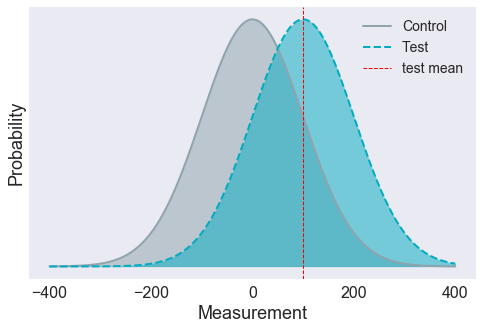

In [7]:
x = np.linspace(-400, 400, 1000)
y_c = st.norm.pdf(x, loc=0.0, scale=100)
y_e = st.norm.pdf(x, loc=100, scale=100)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x,y_c, label='Control', color='#90A4AE')
plt.plot(x,y_e, label='Test', color='#00ACC1', ls='--')
plt.axvline(100.0, color='r', ls='--', label='test mean', lw=1)
ax.fill_between(x, y_c, alpha=0.5, color='#90A4AE')
ax.fill_between(x, y_e, alpha=0.5, color='#00ACC1')

plt.xticks([-400, -200, 0, 200, 400])
plt.yticks([])

plt.legend()

plt.xlabel('Measurement')
plt.ylabel('Probability')

plt.savefig('../simulation_output/plots/run2_sim1_diff_dist.svg', bbox_inches='tight')

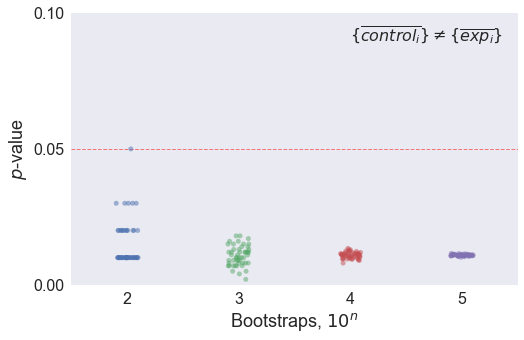

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=df[df.type == 'diff'], x='n', y='corr_p', alpha=0.5, jitter=True, ax=ax)
plt.axhline(0.05, ls='--', lw=1, color='red', alpha=0.5)

plt.ylim(0,0.10)
plt.yticks([0.00, 0.05, 0.10])
plt.gca().set_xticklabels([2, 3, 4, 5])

plt.xlabel('Bootstraps, $10^n$')
plt.ylabel('$p$-value')


plt.text(2, 0.09, r'$\{\overline{control_i}\} \neq \{\overline{exp_i}\}$', fontsize=16)
# plt.title('P-values for varying Bootstraps')

plt.savefig('../simulation_output/plots/run2_sim1_diff.svg', bbox_inches='tight')